In [33]:
# Jumana Ajjawii
# 120882
# Import important libraries/classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Read the data file 
# load our data into a Pandas dataframe
data_file=pd.read_csv(r'SVMdataset.csv')

# Testing if data_file has the right type of data 
data=pd.DataFrame(data_file)
data.head(100)

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
95,0.662442,0.949561,1
96,0.690092,0.936404,1
97,0.683180,0.923246,1
98,0.740783,0.918860,1


In [34]:
# Predictors and responses definition
x = data.iloc[:,:-1]
#x.insert(0, "x0", np.ones(x.shape[0]), True)
y = data.iloc[:,-1]

In [35]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, train_size=0.75, test_size=0.25)

<AxesSubplot:title={'center':'SVM DATASET'}, xlabel='x1', ylabel='x2'>

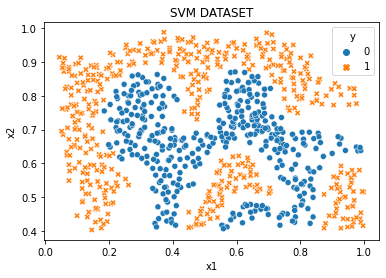

In [36]:
# SVM Dataset plot 
plt.title("SVM DATASET")
sns.scatterplot(x="x1", y="x2", hue='y', data=data, style="y")

<AxesSubplot:title={'center':'SVM training dataset'}, xlabel='x1', ylabel='x2'>

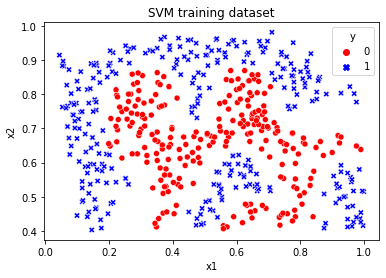

In [37]:
# SVM training dataset
plt.title("SVM training dataset")
sns.scatterplot(x="x1", y="x2", hue=y_train, data=x_train, style=y_train,palette=['red','blue'])

<AxesSubplot:title={'center':'SVM testing dataset'}, xlabel='x1', ylabel='x2'>

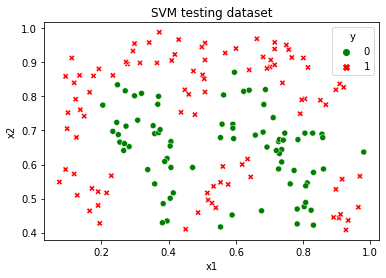

In [38]:
# SVM testing dataset
plt.title("SVM testing dataset")
sns.scatterplot(x="x1", y="x2", hue=y_test, data=x_test, style=y_test ,palette=['green','red'])

<AxesSubplot:title={'center':'SVM validation dataset'}, xlabel='x1', ylabel='x2'>

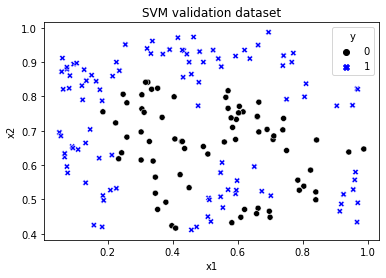

In [39]:
# SVM validation dataset
plt.title("SVM validation dataset")
sns.scatterplot(x="x1", y="x2", hue=y_validate, data=x_validate, style=y_validate,palette=['black','blue'])

In [40]:
# Linear SVM classifier 
# Find the best C value loop:
#Assuming the worst accuracy for comparison 
acc=0
#The numbers where randomly picked with a logarithmeic pattern 
rng = [0.0003,0.001,0.05 ,0.07 ,0.5, 0.7, 5, 0.01, 0.03, 0.1 ,0.3 ,1 ,3 ,10, 30]
#For loop that uses a value for parameter [C] from the range of values above
#Train the model 
#Make predicition using the validation data
for i in rng:
    classifier=SVC(kernel="linear",C=i)
    classifier.fit(x_train,y_train)
    y_predict_validate=classifier.predict(x_validate)
    f1=f1_score(y_validate,y_predict_validate)
    if(f1>acc):
        acc=f1
        C=i
print("Best value of C out of the range is: ",C)
print("Best value of f1_score out of the range is: ",acc)

Best value of C out of the range is:  0.0003
Best value of f1_score out of the range is:  0.7418181818181818


<Figure size 432x288 with 0 Axes>

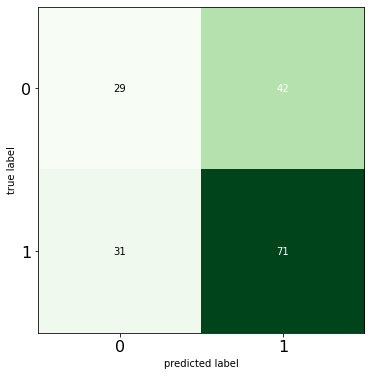

In [41]:
#Confusion Matrix Of Validation Data
cm = confusion_matrix(y_validate,y_predict_validate)
plt.figure()
plot_confusion_matrix(cm, figsize=(10,6), hide_ticks=True, cmap=plt.cm.Greens)
plt.xticks(range(2), fontsize=16)
plt.yticks(range(2), fontsize=16)
plt.show()

Text(0, 0.5, 'X2')

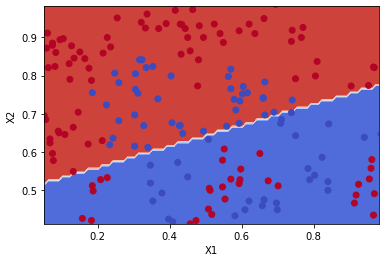

In [42]:
#Decision Boundary for validation data
# define bounds of the domain
h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x_validate.iloc[:, 0].min(),x_validate.iloc[:, 0].max() 
y_min, y_max = x_validate.iloc[:, 1].min(),x_validate.iloc[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
# Plot also the validation points
plt.scatter(x_validate.iloc[:, 0], x_validate.iloc[:, 1], c=y_validate, cmap=plt.cm.coolwarm,)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')

In [43]:
#Prediction of training data 
y_predict_train=classifier.predict(x_train)

Text(0, 0.5, 'X2')

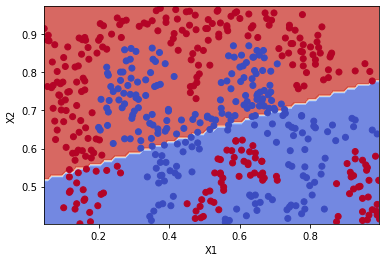

In [44]:
#Decision Boundary for training data
# define bounds of the domain
h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x_train.iloc[:, 0].min() , x_train.iloc[:, 0].max() 
y_min, y_max = x_train.iloc[:, 1].min() , x_train.iloc[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#plt.subplot(5, 5, 1)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')
#plt.xticks(())
#plt.yticks(())

<Figure size 432x288 with 0 Axes>

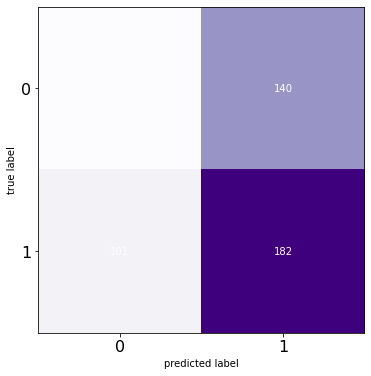

In [45]:
#Confusion Matrix Of Training Data
cm = confusion_matrix(y_train,y_predict_train)
plt.figure()
plot_confusion_matrix(cm, figsize=(10,6), hide_ticks=True, cmap=plt.cm.Purples)
plt.xticks(range(2), fontsize=16)
plt.yticks(range(2), fontsize=16)
plt.show()

In [46]:
#Test model 
#classifier=SVC(kernel="linear",C=0.05)
classifier.fit(x_train,y_train)
y_predict_test=classifier.predict(x_test)
print("F1_Score value is: ",f1_score(y_test,y_predict_test))

F1_Score value is:  0.6564102564102564


<Figure size 432x288 with 0 Axes>

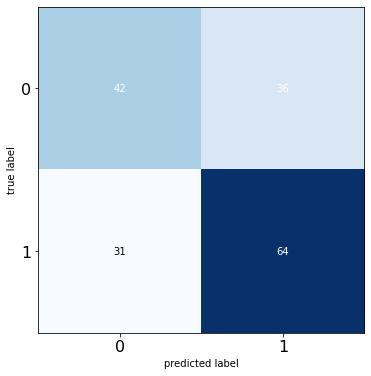

In [47]:
#Confusion Matrix Of Testing Data
cm = confusion_matrix(y_test,y_predict_test)
plt.figure()
plot_confusion_matrix(cm, figsize=(10,6), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), fontsize=16)
plt.yticks(range(2), fontsize=16)
plt.show()

Text(0, 0.5, 'X2')

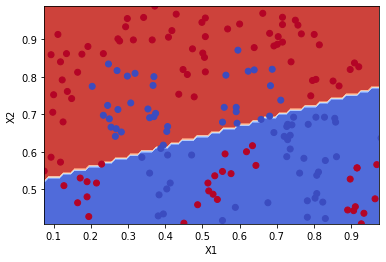

In [52]:
#Decision Boundary for testing data
# define bounds of the domain
h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x_test.iloc[:, 0].min(),x_test.iloc[:, 0].max() 
y_min, y_max = x_test.iloc[:, 1].min(),x_test.iloc[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
# Plot also the validation points
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, cmap=plt.cm.coolwarm,)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')

In [49]:
 #Classsification reoprt for training data
print(classification_report(y_train,y_predict_train))
print("The accuracy is: ",accuracy_score(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.48      0.40      0.44       234
           1       0.57      0.64      0.60       283

    accuracy                           0.53       517
   macro avg       0.52      0.52      0.52       517
weighted avg       0.53      0.53      0.53       517

The accuracy is:  0.5338491295938105


In [50]:
#Classsification reoprt for validation data
print(classification_report(y_validate,y_predict_validate))
print("The accuracy is: ",accuracy_score(y_validate,y_predict_validate))

              precision    recall  f1-score   support

           0       0.48      0.41      0.44        71
           1       0.63      0.70      0.66       102

    accuracy                           0.58       173
   macro avg       0.56      0.55      0.55       173
weighted avg       0.57      0.58      0.57       173

The accuracy is:  0.5780346820809249


In [51]:
#Classsification reoprt for test data
print(classification_report(y_test,y_predict_test))
print("The accuracy is: ",accuracy_score(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        78
           1       0.64      0.67      0.66        95

    accuracy                           0.61       173
   macro avg       0.61      0.61      0.61       173
weighted avg       0.61      0.61      0.61       173

The accuracy is:  0.6127167630057804
